#### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Creating our sample dataset

In [2]:
# Create a large custom dataset
np.random.seed(42)  # For reproducibility

In [3]:
# Number of records
n_records = 1000

In [4]:
# Generate synthetic data
data = {
    "Customer_ID": np.arange(1, n_records + 1),
    "Age": np.random.randint(18, 70, n_records),
    "Gender": np.random.choice(["Male", "Female"], n_records),
    "Region": np.random.choice(["North", "South", "East", "West"], n_records),
    "Product_Category": np.random.choice(
        ["Electronics", "Clothing", "Home Appliances", "Books", "Sports"], n_records
    ),
    "Monthly_Spend": np.random.normal(500, 100, n_records).round(2),  # Normal distribution
    "Customer_Satisfaction": np.random.randint(1, 6, n_records),  # 1 (low) to 5 (high)
    "Marketing_Channel": np.random.choice(
        ["Email", "Social Media", "TV Ads", "Direct Mail"], n_records
    ),
    "Purchase_Frequency": np.random.poisson(2, n_records),  # Poisson distribution
    "Discount_Used": np.random.choice([0, 1], n_records, p=[0.3, 0.7]),  # 70% yes
}

#### 3. DataFrame Conversion

In [5]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [6]:
# Display a summary of the dataset
print(df.head())
print(df.describe())

   Customer_ID  Age  Gender Region Product_Category  Monthly_Spend  \
0            1   56    Male  North            Books         452.52   
1            2   69    Male  South  Home Appliances         271.33   
2            3   46    Male   West           Sports         512.58   
3            4   32  Female  North            Books         498.58   
4            5   60    Male   West            Books         413.80   

   Customer_Satisfaction Marketing_Channel  Purchase_Frequency  Discount_Used  
0                      2       Direct Mail                   1              0  
1                      5       Direct Mail                   0              0  
2                      5             Email                   3              0  
3                      5             Email                   2              0  
4                      2             Email                   1              1  
       Customer_ID         Age  Monthly_Spend  Customer_Satisfaction  \
count  1000.000000  1000.00

#### 4. Visualization Techniques

In [9]:
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

##### 1. Distribution Plot for Age

Text(0.5, 1.0, 'Age Distribution')

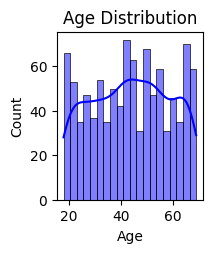

In [16]:
plt.subplot(2, 3, 1)
sns.histplot(df["Age"], kde=True, color="blue", bins=20)
plt.title("Age Distribution")

#### 2. Bar Plot for Product Categories

C:\Users\hp\AppData\Local\Temp\ipykernel_402016\3056569323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Product_Category", data=df, palette="viridis")


Text(0.5, 1.0, 'Product Categories')

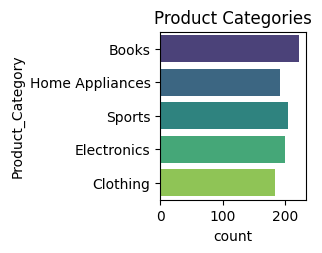

In [17]:
plt.subplot(2, 3, 2)
sns.countplot(y="Product_Category", data=df, palette="viridis")
plt.title("Product Categories")


#### 3. Scatter Plot: Age vs Monthly Spend

Text(0, 0.5, 'Monthly Spend')

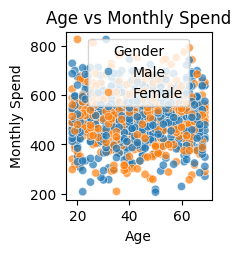

In [18]:
plt.subplot(2, 3, 3)
sns.scatterplot(x="Age", y="Monthly_Spend", hue="Gender", data=df, alpha=0.7)
plt.title("Age vs Monthly Spend")
plt.xlabel("Age")
plt.ylabel("Monthly Spend")

#### 4. Box Plot for Monthly Spend by Product Category

C:\Users\hp\AppData\Local\Temp\ipykernel_402016\3825287213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Product_Category", y="Monthly_Spend", data=df, palette="Set3")


Text(0.5, 1.0, 'Monthly Spend by Product Category')

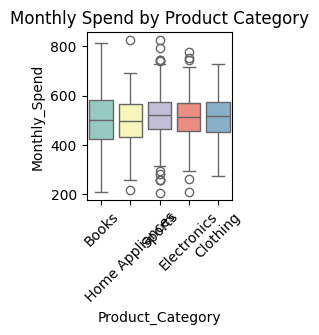

In [19]:
plt.subplot(2, 3, 4)
sns.boxplot(x="Product_Category", y="Monthly_Spend", data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Monthly Spend by Product Category")

#### 5. Heatmap: Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

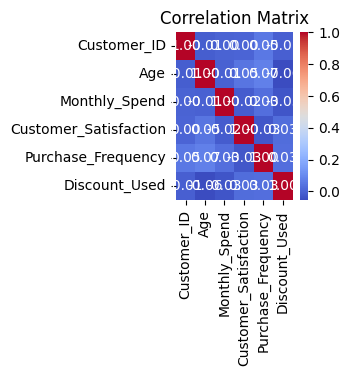

In [20]:
plt.subplot(2, 3, 5)
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

#### 6. Pie Chart for Marketing Channels

Text(0.5, 1.0, 'Marketing Channels')

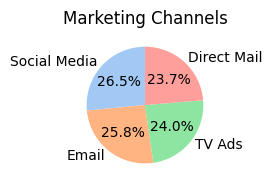

In [21]:
plt.subplot(2, 3, 6)
channel_counts = df["Marketing_Channel"].value_counts()
plt.pie(
    channel_counts,
    labels=channel_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90,
)
plt.title("Marketing Channels")

In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### 7. Pairplot for Multivariate Analysis

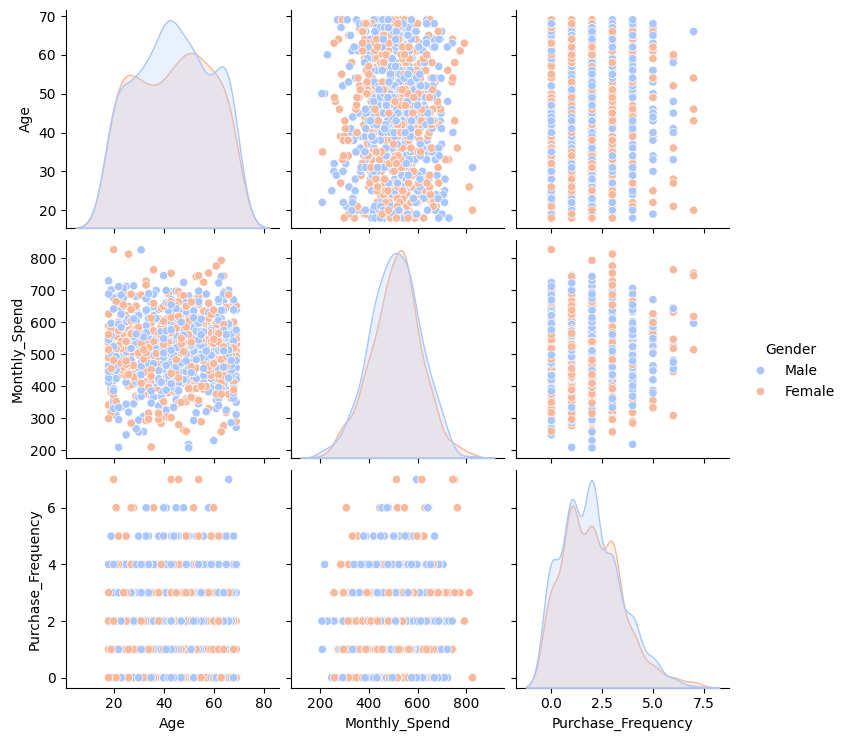

In [24]:
sns.pairplot(
    df,
    vars=["Age", "Monthly_Spend", "Purchase_Frequency"],
    hue="Gender",
    palette="coolwarm",
    diag_kind="kde",
)
plt.show()

#### 8. Swarmplot for Customer Satisfaction by Marketing Channel

C:\Users\hp\AppData\Local\Temp\ipykernel_402016\1531251503.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


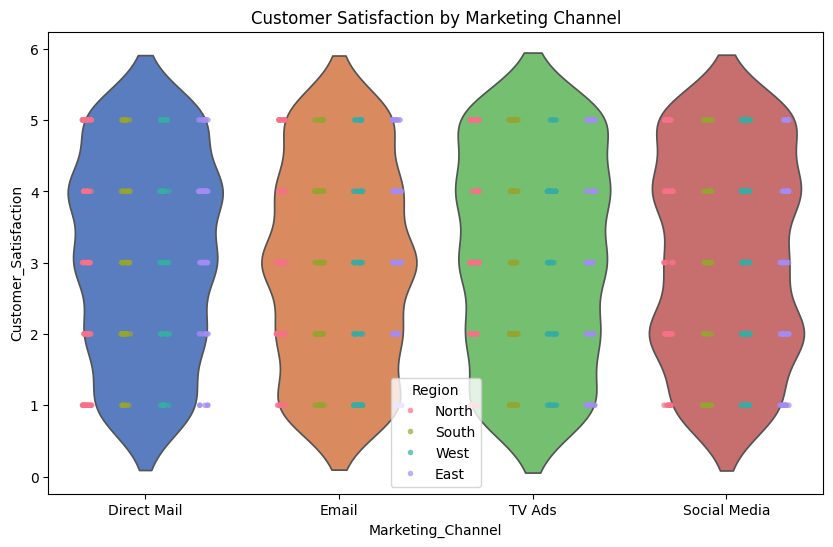

In [34]:
plt.figure(figsize=(10, 6))

# sns.swarmplot(
#     x="Marketing_Channel",
#     y="Customer_Satisfaction",
#     hue="Region",
#     data=df,
#     palette="husl",
#     dodge=True,  # Spread points horizontally
#     alpha=0.8,  # Adjust transparency
# )

sns.violinplot(
    x="Marketing_Channel",
    y="Customer_Satisfaction",
    data=df,
    inner=None,  # Hide internal details of violin
    palette="muted",
)
sns.stripplot(
    x="Marketing_Channel",
    y="Customer_Satisfaction",
    hue="Region",
    data=df,
    palette="husl",
    dodge=True,
    alpha=0.7,
    size=4,
)

plt.title("Customer Satisfaction by Marketing Channel")
plt.show()

#### 9. Violin Plot for Monthly Spend Distribution by Discount Used

C:\Users\hp\AppData\Local\Temp\ipykernel_402016\1121636638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


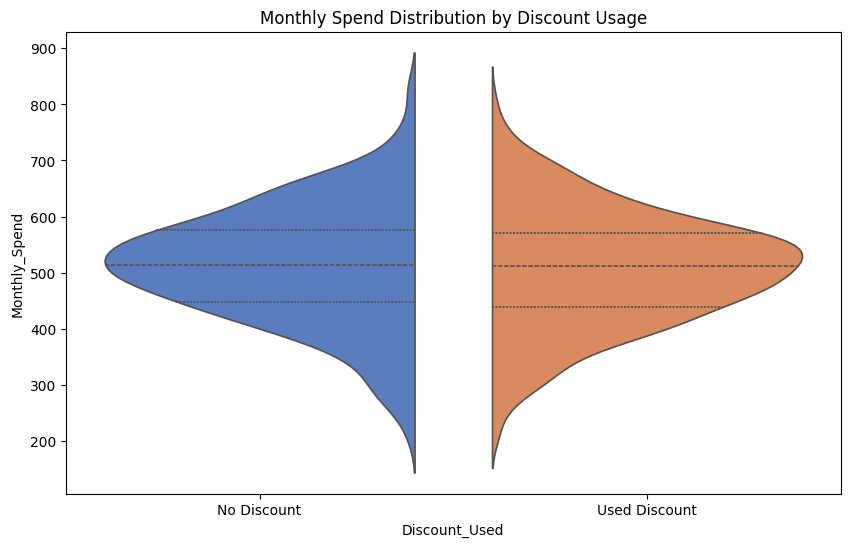

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="Discount_Used",
    y="Monthly_Spend",
    data=df,
    split=True,
    palette="muted",
    inner="quartile",
)
plt.title("Monthly Spend Distribution by Discount Usage")
plt.xticks([0, 1], ["No Discount", "Used Discount"])
plt.show()

Explanation and Insights from Each Graph
1. Age Distribution (Histogram + KDE Plot)
Reason for Plotting:
This graph is used to understand the distribution of customer ages. It helps to identify the most common age group and whether the data is skewed or normally distributed.

Observation:

The age distribution shows a peak around the 30–40 age range.
A slight skew towards younger demographics is visible.
The Kernel Density Estimate (KDE) curve smooths out the distribution, showing that most customers are between 20 and 50 years old.
Conclusion:
The majority of customers belong to a younger age group, indicating a target audience for marketing campaigns.

2. Product Categories (Bar Plot)
Reason for Plotting:
This bar plot highlights the frequency of purchases for different product categories. It helps identify the most popular products.

Observation:

"Clothing" and "Electronics" are the most purchased product categories.
"Books" and "Home Appliances" have relatively lower counts.
Conclusion:
Efforts should focus on promoting less popular categories or expanding inventory for high-demand categories like "Clothing" and "Electronics."

3. Age vs Monthly Spend (Scatter Plot)
Reason for Plotting:
The scatter plot helps explore relationships between a continuous variable (age) and monthly spending, while the color hue shows differences by gender.

Observation:

A weak positive correlation between age and spending exists, meaning older customers tend to spend slightly more.
Gender segmentation shows spending patterns are similar for males and females.
Conclusion:
Both genders contribute equally to spending, but age-based targeted campaigns for older customers might increase spending.

4. Monthly Spend by Product Category (Box Plot)
Reason for Plotting:
Box plots visualize the spread and outliers of monthly spending for each product category, helping understand variability and patterns.

Observation:

"Electronics" has the highest spending, with a larger spread.
"Books" and "Clothing" have lower median spending values but are more consistent (less variance).
Outliers exist in most categories, especially "Electronics."
Conclusion:
The high variability in electronics spending suggests potential for premium or budget products, while consistency in other categories indicates a stable price preference.

5. Correlation Matrix (Heatmap)
Reason for Plotting:
A correlation matrix highlights relationships between numerical variables, helping identify patterns that might not be obvious.

Observation:

Positive correlation: Monthly spending correlates slightly with age and purchase frequency.
Weak or no correlation: Satisfaction and discounts used have almost no linear relationship with other variables.
Conclusion:
Age and purchase frequency are the strongest predictors of spending, but the correlations are weak. Other variables need to be explored for significant insights.

6. Marketing Channels (Pie Chart)
Reason for Plotting:
A pie chart provides an easy-to-understand visual breakdown of marketing channel usage.

Observation:

Social Media and TV Ads dominate the marketing efforts.
Direct Mail is the least used channel.
Conclusion:
Focus on social media and TV ads to capitalize on their existing popularity. Direct mail might need reevaluation or optimization to improve ROI.

7. Pairplot (Age, Monthly Spend, Purchase Frequency)
Reason for Plotting:
Pair plots allow visualization of pairwise relationships and distributions, helping uncover hidden trends between multiple variables.

Observation:

Spending tends to increase slightly with age and purchase frequency, as evident from scatter plots.
The KDE diagonal plots show slightly skewed distributions.
Conclusion:
Pairwise relationships indicate a need for further segmentation analysis to enhance insights into spending habits.

8. Customer Satisfaction by Marketing Channel (Swarm Plot)
Reason for Plotting:
The swarm plot shows the distribution of customer satisfaction scores by marketing channel, highlighting differences between regions.

Observation:

Social Media and TV Ads have higher satisfaction scores.
Scores for Email and Direct Mail are lower across regions.
Conclusion:
Investment in social media and TV ad campaigns might yield better customer satisfaction, while Email and Direct Mail strategies need improvement.

9. Monthly Spend by Discount Usage (Violin Plot)
Reason for Plotting:
The violin plot visualizes the distribution of spending based on discount usage, including the spread and density of values.

Observation:

Customers who used discounts tend to spend more on average.
Non-discount spenders have a narrower spread of spending, indicating a conservative spending pattern.
Conclusion:
Offering discounts drives higher spending, suggesting that discount strategies could significantly boost revenue.

Final Takeaway
By combining these visualizations, we can:

Identify target demographics (younger age groups, social media users).
Understand customer spending patterns by category and discounts.
Focus on strategies for underperforming products or channels.
This workflow simulates an industry-style exploratory data analysis (EDA) approach, preparing actionable insights for stakeholders.